In [1]:
!pip install matplotlib
!pip install polars

In [2]:
%run utilities.ipynb

In [3]:
import matplotlib.pyplot as plt
import polars as pl
from collections import defaultdict

In [4]:
df_polars = pl.read_csv("Polars.csv").with_columns(file=pl.lit("Polars.csv"))
df_pandas_pyarrow = pl.read_csv("Pandas2.0Pyarrow.csv").with_columns(file=pl.lit("Pandas2.0Pyarrow.csv"))
df_pandas_numpy = pl.read_csv("Pandas2.0Numpy.csv").with_columns(file=pl.lit("Pandas2.0Numpy.csv"))
df_all = pl.concat([df_polars,df_pandas_pyarrow,df_pandas_numpy])

cols = ["Polars", "Pandas2.0Pyarrow", "Pandas2.0Numpy"]

colors = ["green", "blue", "red"]
with pl.Config(tbl_rows=100, tbl_cols= 100):
    display(df_all)

,type,read_file,memory_size_read,select,memory_size_select,filter,memory_size_filter,agg,memory_size_agg,sort,memory_size_sort,complex,memory_size_complex,repetitions,file
i64,str,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,str
0,"""sum""",19.296343,402900275,0.003723,59741169,0.308682,216,0.468256,106,0.95523,59741083,4.050942,960,100,"""Polars.csv"""
1,"""avg""",0.192963,402900275,0.000037,59741169,0.003087,216,0.004683,106,0.009552,59741083,0.040509,960,100,"""Polars.csv"""
2,"""min""",0.180958,402900275,0.000021,59741169,0.001128,216,0.003579,106,0.006351,59741083,0.034881,960,100,"""Polars.csv"""
3,"""max""",0.26856,402900275,0.000497,59741169,0.005303,216,0.015536,106,0.035733,59741083,0.057498,960,100,"""Polars.csv"""
0,"""sum""",138.255116,1010114540,0.197984,13912248,0.015083,795,0.177589,400,0.340357,15794967,0.655431,3245,100,"""Pandas2.0Pyarrow.csv"""
1,"""avg""",1.382551,1010114540,0.00198,13912248,0.000151,795,0.001776,400,0.003404,15794967,0.006554,3245,100,"""Pandas2.0Pyarrow.csv"""
2,"""min""",0.91379,1010114540,0.001621,13912248,0.000076,795,0.001441,400,0.002516,15794967,0.004417,3245,100,"""Pandas2.0Pyarrow.csv"""
3,"""max""",3.021836,1010114540,0.00372,13912248,0.000801,795,0.012897,400,0.008359,15794967,0.121039,3245,100,"""Pandas2.0Pyarrow.csv"""
0,"""sum""",334.475651,1045514780,0.404683,13976296,0.012499,803,0.165532,400,0.388128,15863807,0.599491,3245,100,"""Pandas2.0Numpy.csv"""


In [5]:
stats = [x for x in df_polars.columns if x not in ["type", "repetitions", "file"]]
type_c = "sum"
dict_stats = defaultdict(list)
for s in stats:
    dict_stats[s].append(df_polars.filter(pl.col("type") == type_c).select(pl.col(s)).item())
    dict_stats[s].append(df_pandas_pyarrow.filter(pl.col("type") == type_c).select(pl.col(s)).item())
    dict_stats[s].append(df_pandas_numpy.filter(pl.col("type") == type_c).select(pl.col(s)).item())

total_list = []

for i in range(len(cols)):
    sum_l = []
    for k in dict_stats.keys():
        if not k.startswith("memory_"):
            sum_l.append(dict_stats[k][i])
    total_list.append(sum(sum_l))

total_list_memory = []

for i in range(len(cols)):
    sum_l = []
    for k in dict_stats.keys():
        if k.startswith("memory_"):
            sum_l.append(dict_stats[k][i])
    total_list_memory.append(sum(sum_l))
    

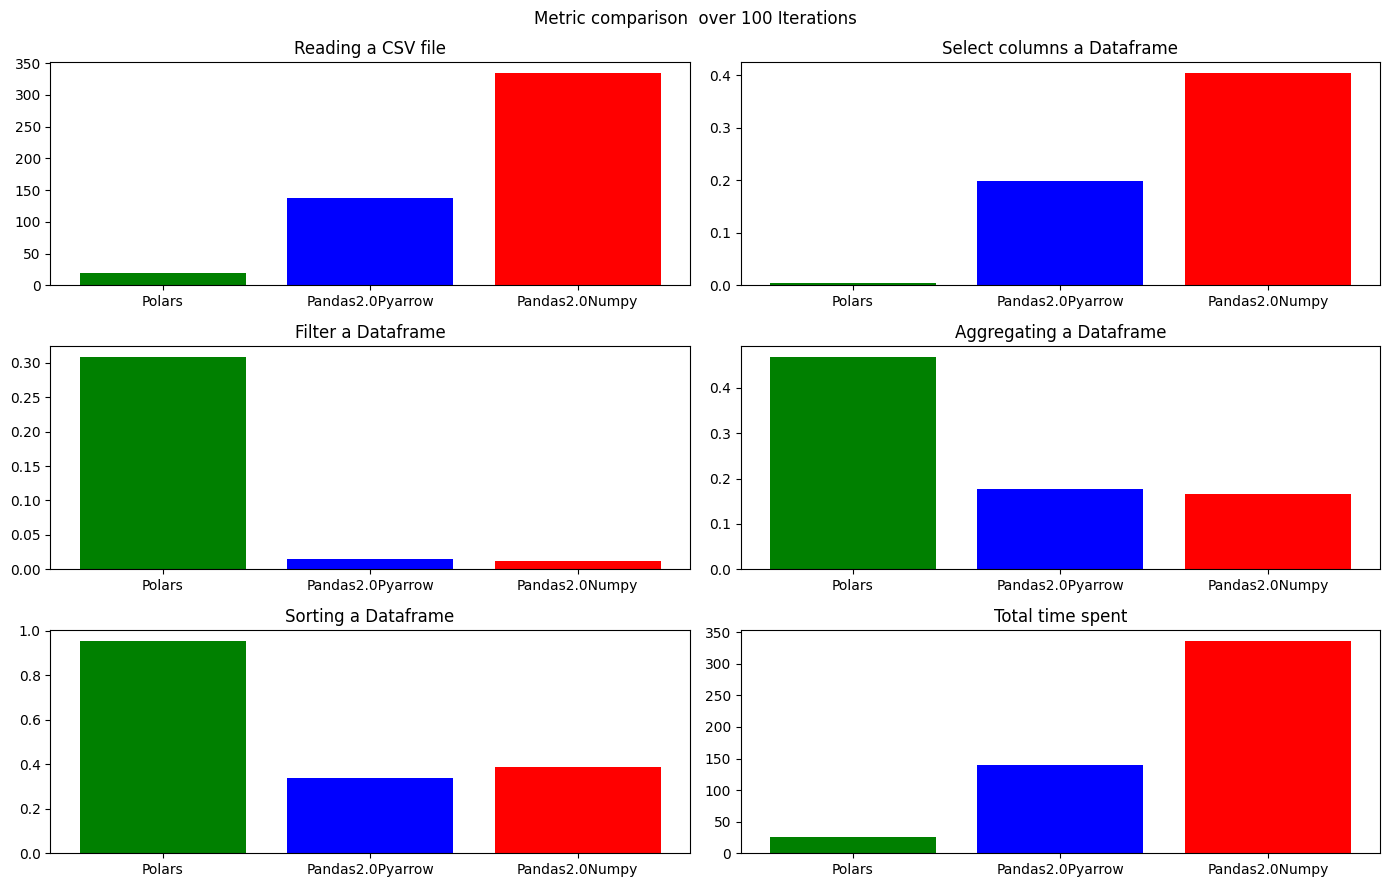

In [6]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(14, 9))
fig.suptitle(f'Metric comparison  over {REPETITIONS} Iterations')

ax1.bar(cols, dict_stats["read_file"], color=colors)
ax1.title.set_text('Reading a CSV file')

ax2.bar(cols, dict_stats["select"], color=colors)
ax2.title.set_text('Select columns a Dataframe')

ax3.bar(cols, dict_stats["filter"], color=colors)
ax3.title.set_text('Filter a Dataframe')

ax4.bar(cols, dict_stats["agg"], color=colors)
ax4.title.set_text('Aggregating a Dataframe')

ax5.bar(cols, dict_stats["sort"], color=colors)
ax5.title.set_text('Sorting a Dataframe')

ax6.bar(cols, total_list, color=colors)
ax6.title.set_text('Total time spent')

plt.tight_layout()
plt.show()

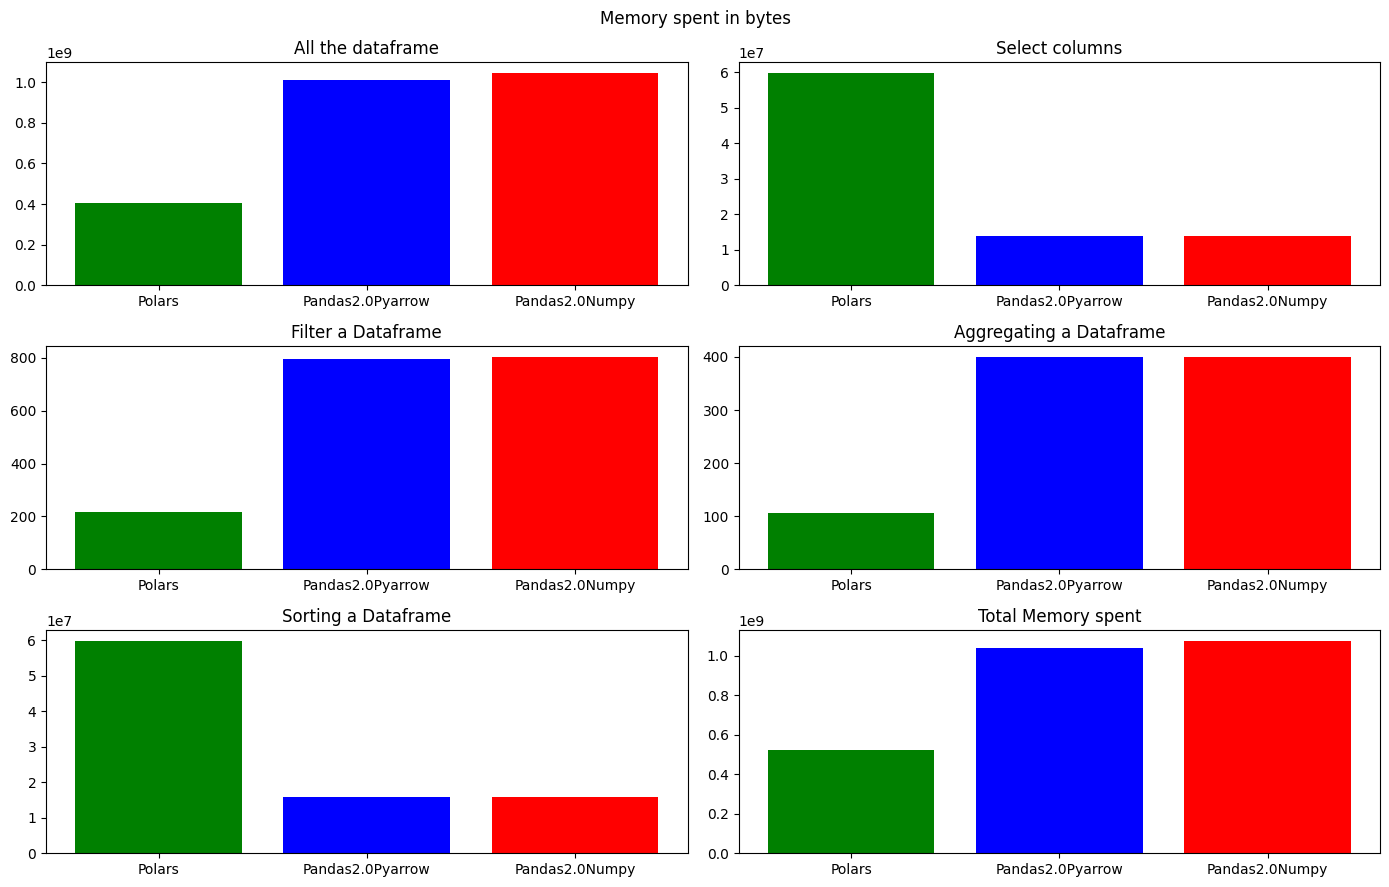

In [7]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(14, 9))
fig.suptitle('Memory spent in bytes')

ax1.bar(cols, dict_stats["memory_size_read"], color=colors)
ax1.title.set_text('All the dataframe')

ax2.bar(cols, dict_stats["memory_size_select"], color=colors)
ax2.title.set_text('Select columns')

ax3.bar(cols, dict_stats["memory_size_filter"], color=colors)
ax3.title.set_text('Filter a Dataframe')

ax4.bar(cols, dict_stats["memory_size_agg"], color=colors)
ax4.title.set_text('Aggregating a Dataframe')

ax5.bar(cols, dict_stats["memory_size_sort"], color=colors)
ax5.title.set_text('Sorting a Dataframe')

ax6.bar(cols, total_list_memory, color=colors)
ax6.title.set_text('Total Memory spent')

plt.tight_layout()
plt.show()